<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> <h1>Tarea Semanal 8: Filtros Digitales</h1></center>
<h3> Teoría de circuitos 2 </h3>
<h3> 2do Cuatrimestre 2023 </h3>    
<h3> Facundo N. Iglesias </h3>    
</div>

<div class="alert alert-success text-left">

<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 

<center> <h1>INDICE</h1></center>
    
</div>

0. [LIBRERIAS](#lib)

1. [PARTE 1](#parte1)
    - [1.1 Ejercicio 2](#ej2)
    - [1.2 Frecuencia de muestreo de 100 kHz](#ej2A)
    - [1.3 Frecuencia de muestreo de 10 kHz](#ej2B)
    - [1.4 Pasa-altos con frecuencia de corte de 6 kHz](#ej2C)
    - [1.5 Prewarping](#ej2D)
2. [PARTE 2](#parte2)
    - [2.1 Ejercicio 3](#ej3)
    - [2.2 Filtro de media movil](#ej3a)
    - [2.3 Filtro Diferenciador](#ej3b)


<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="lib">
        <h1> LIBRERIAS</h1>
    </a> 
</center>
</div>

In [7]:
#Numeric
import numpy as np
from numpy import sqrt
#Simbolic
import sympy as sp
from sympy.abc import s
from sympy.parsing.sympy_parser import parse_expr
from sympy.solvers import solve
#Visual & graphs
import matplotlib.pyplot as plt
from IPython.display import IFrame, display, Math
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
#Simulation
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys,  tf2sos_analog
from pytc2.sistemas_lineales import plot_plantilla, group_delay, pzmap

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="parte1">
        <h1>PARTE 1</h1>
    </a>    
</center>
</div>

<a name="ej2">
   <h2>1.1 Ejercicio 2</h2>
</a>
<img src="./rsc/Ej2.png" align="center" width="806" height="427" /> 


Partimos de la expresión de un filtro pasabajos de orden 2 en el dominio de Laplace: 

In [3]:
w0, Q, K, fs, Z = sp.symbols("w0, Q, K, fs, Z")

H_s = w0**2/(s**2+(w0/Q)*s+w0**2)
H_s

w0**2/(s**2 + w0**2 + s*w0/Q)

Según la consigna, se debe diseñar un filtro Butterworth de orden 2:

\begin{equation}
f_c = 1kHz
\end{equation}

\begin{equation}
\omega_0 = 2\pi f_c
\end{equation}

\begin{equation}
Q = \frac{\sqrt{2}}{2}
\end{equation}

\begin{equation}
n = 2
\end{equation}

### Transformación al dominio Z

Empleando el núcleo de la bilineal:

In [3]:
nucleo = K*(Z-1)/(Z+1)
nucleo

K*(Z - 1)/(Z + 1)

Siendo K:
\begin{equation}
K = 2fs
\end{equation}

Transformamos al dominio de Z:

In [4]:
H_z = H_s.replace(s,nucleo)
H_z

w0**2/(K**2*(Z - 1)**2/(Z + 1)**2 + K*w0*(Z - 1)/(Q*(Z + 1)) + w0**2)

In [5]:
H_z = sp.simplify(H_z)
H_z

Q*w0**2*(Z + 1)**2/(K**2*Q*(Z - 1)**2 + K*w0*(Z - 1)*(Z + 1) + Q*w0**2*(Z + 1)**2)

Separando el numerador del denominador para trabajarlos:

In [6]:
num = Q*w0**2*(Z+1)**2
num

Q*w0**2*(Z + 1)**2

In [7]:
den = (H_z/num)**-1
den = sp.collect(den.expand(),Z)
den

K**2*Q - K*w0 + Q*w0**2 + Z**2*(K**2*Q + K*w0 + Q*w0**2) + Z*(-2*K**2*Q + 2*Q*w0**2)

In [8]:
num = num.expand()
num

Q*Z**2*w0**2 + 2*Q*Z*w0**2 + Q*w0**2

Reemplazando por los parámetros de diseño:

In [9]:
den = den.subs( w0, 2 * np.pi * 1000 )
den = den.subs( Q, sqrt(2)/2 )
den

0.707106781186548*K**2 - 6283.18530717959*K + Z**2*(0.707106781186548*K**2 + 6283.18530717959*K + 27915456.7985555) + Z*(55830913.597111 - 1.4142135623731*K**2) + 27915456.7985555

In [10]:
num = num.subs( w0, 2 * np.pi * 1000 )
num = num.subs( Q, sqrt(2)/2 )
num

27915456.7985555*Z**2 + 55830913.597111*Z + 27915456.7985555

<a name="ej2A">
   <h2>A) Frecuencia de muestreo de 100 kHz</h2>
</a>

In [11]:
fs1 = 100000
num1 = num.subs(K,2*fs1)
den1 = den.subs(K,2*fs1)
H1 = num1/den1
H1

(27915456.7985555*Z**2 + 55830913.597111*Z + 27915456.7985555)/(29568823765.6964*Z**2 - 56512711581.3267*Z + 27055549642.8245)

Obtenemos los ceros:

In [12]:
np.roots([27915456.7985555, 55830913.597111, 27915456.7985555])

array([-1., -1.])

Observamos que al ser el dominio de Z (Digital) una circunferencia de radio unitario, que los ceros estén en -1 es equivalente a tener ceros en el infinito en el dominio de s (Analógico)

Obtenemos los polos:

In [13]:
np.roots([29568823765.6964,-56512711581.3267,27055549642.8245])

array([0.95561312+0.04249872j, 0.95561312-0.04249872j])

Para el caso de los polos vemos que 
- Son complejos conjugados.
- Se encuentran situados dentro de la circunferencia de radio unitario que se corresponde con el limite de estabilidad.
- Se encuentran muy cerca del otro extremo de la circunferencia de radio unitario.

Obtenemos la expresión para el filtro Butterworth en el dominio de Laplce:

In [14]:
H_s = H_s.subs( w0, 2 * np.pi * 1000 )
H_s = H_s.subs( Q, sqrt(2)/2 )
H_s

39478417.6043574/(s**2 + 8885.76587631673*s + 39478417.6043574)

### Gráfico de polos y ceros
Se visualiza a continuación los polos y ceros y calculados en un diagrama:

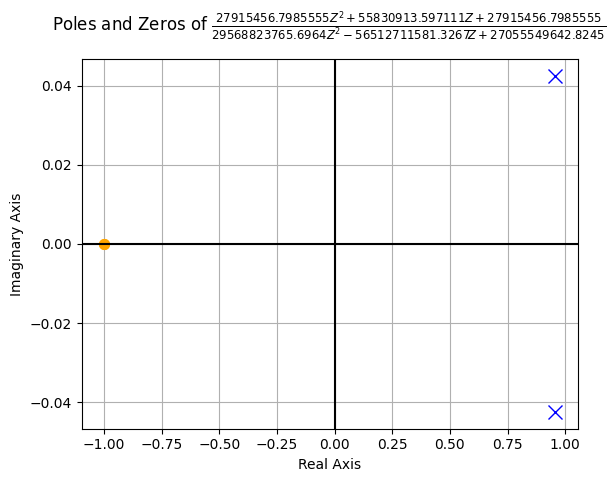

In [15]:
tfz = TransferFunction(27915456.7985555*𝑍**2+55830913.597111*𝑍+27915456.7985555, 
                      29568823765.6964*𝑍**2-56512711581.3267*𝑍+27055549642.8245, Z)      
pole_zero_plot(tfz)   

Para el caso de la transferencia en el dominio de Laplace:

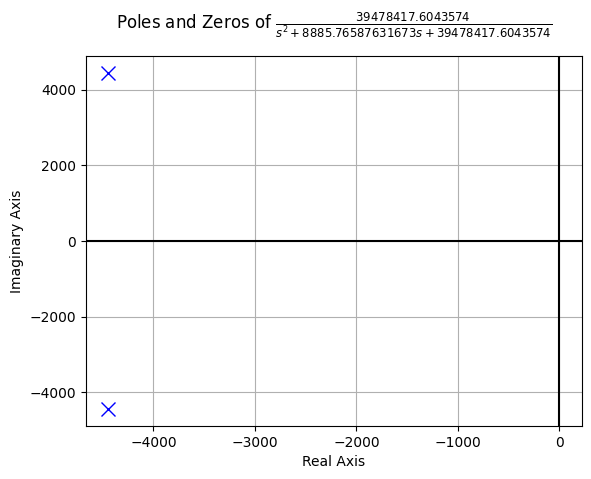

In [16]:
tfs = TransferFunction(39478417.6043574, 𝑠**2+8885.76587631673*𝑠+39478417.6043574, s)
pole_zero_plot(tfs)   

### Respuesta de modulo y fase

Construimos el filtro analógico Butterworth de orden 2 verificando que cumple con lo calculado:

In [17]:
numS,denS = sig.butter(2, 2 * np.pi * 1000,btype='lowpass',analog = True)
print(numS)
print(denS)

[39478417.60435743]
[1.00000000e+00 8.88576588e+03 3.94784176e+07]


Empleando la funcionfreqz aplicamos la transformada bilineal 

In [18]:
numZ,denZ = sig.bilinear(numS, denS,fs=fs1)
wz, Hz = sig.freqz(numZ, denZ)
ws, Hs = sig.freqs(numS, denS, worN=fs1*wz)

Graficamos ambas respuestas en un gráfico logaritmico:

Text(1000, -3, '-3dB')

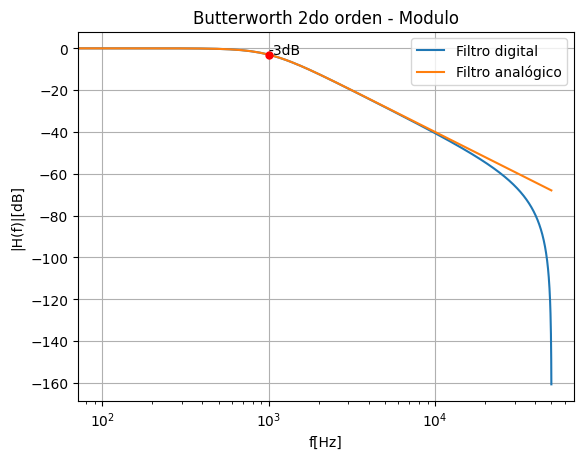

In [19]:
fig = plt.figure()
plt.grid(True)
plt.title('Butterworth 2do orden - Modulo')
plt.semilogx(wz*fs1/(2*np.pi), 20*np.log10(np.abs(Hz)),
             label='Filtro digital')
plt.semilogx(wz*fs1/(2*np.pi), 20*np.log10(np.abs(Hs)),
             label='Filtro analógico')
plt.legend()
plt.xlabel('f[Hz]')
plt.ylabel('|H(f)|[dB]')    
plt.plot(10**3, -3, 'o', color='red', ms=5)
plt.annotate("-3dB", [10**3, -3])

Text(1000, -1.5707963267948966, '-pi/2 rad')

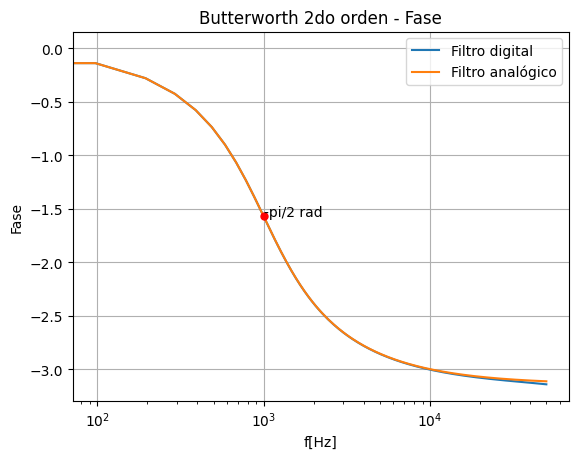

In [20]:
fig = plt.figure()
plt.grid(True)
plt.title('Butterworth 2do orden - Fase')
plt.semilogx(wz*fs1/(2*np.pi), np.angle(Hz),
             label='Filtro digital')
plt.semilogx(wz*fs1/(2*np.pi), np.angle(Hs),
             label='Filtro analógico')
plt.legend()
plt.xlabel('f[Hz]')
plt.ylabel('Fase')    
plt.plot(10**3, -np.pi/2, 'o', color='red', ms=5)
plt.annotate("-pi/2 rad", [10**3, -np.pi/2])

<a name="ej2B">
   <h2>B) Frecuencia de muestreo de 10 kHz</h2>
</a>

In [21]:
fs2 = 10000
num2 = num.subs(K,2*fs2)
den2 = den.subs(K,2*fs2)
H2 = num2/den2
H2

(27915456.7985555*Z**2 + 55830913.597111*Z + 27915456.7985555)/(436421875.416766*Z**2 - 509854511.352127*Z + 185094463.129583)

### Gráfico de polos y ceros
Se visualiza a continuación los polos y ceros y calculados en un diagrama:

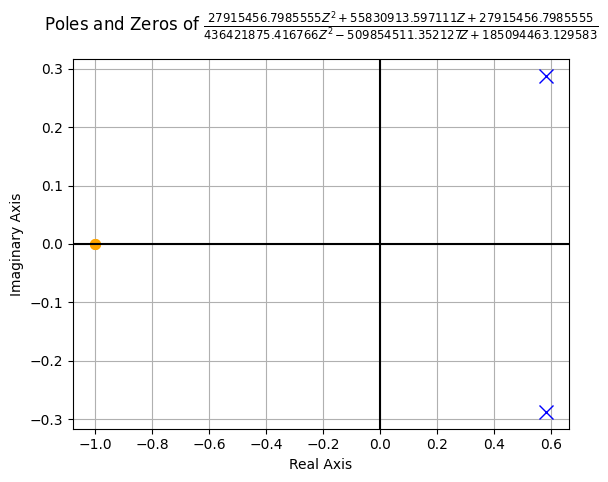

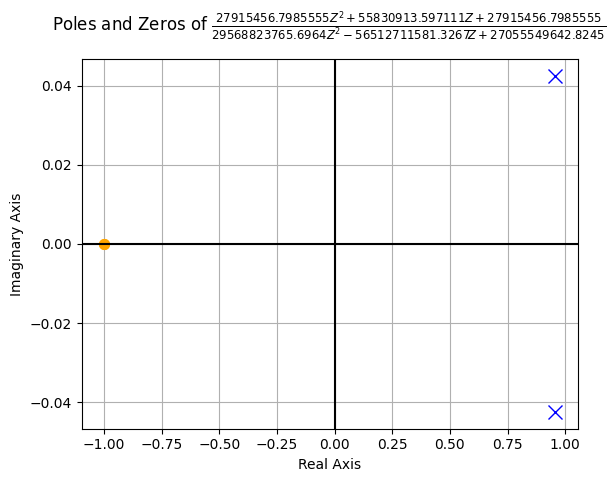

In [22]:
tfz2 = TransferFunction(27915456.7985555*𝑍**2+55830913.597111*𝑍+27915456.7985555, 
                      436421875.416766*𝑍**2-509854511.352127*𝑍+185094463.129583, Z)      
pole_zero_plot(tfz2)   
pole_zero_plot(tfz)   

A modo de comparación se grafica nuevamente el diagrama de polos y ceros obtenido en el apartado anterior, notandosé que:
- Los ceros permanecen en -1.
- Los polos ahora estan mas separados y alejados de 1, pero siempre se mueven en la dirección de la circunferencia de radio unitario.

Como conclusión vemos que podemos obtener diferentes transferencias simplemente variando la frecuencia de muestreo.  La transición cambia a medida que los polos se alejan de 1 como se puede visualizar en los gráficos más abajo, similar a lo que pasaba con los filtros analógicos según su distancia al eje jw.

### Respuesta de modulo y fase

In [23]:
numZ,denZ = sig.bilinear(numS, denS,fs=fs2)
wz2, Hz2 = sig.freqz(numZ, denZ)
ws2, Hs2 = sig.freqs(numS, denS, worN=fs2*wz2)

Text(1000, -3, '-3dB')

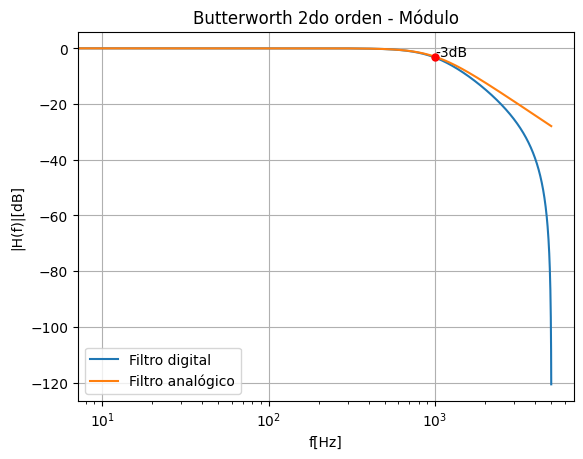

In [24]:
fig = plt.figure()
plt.grid(True)
plt.title('Butterworth 2do orden - Módulo')
plt.semilogx(wz2*fs2/(2*np.pi), 20*np.log10(np.abs(Hz2)),
             label='Filtro digital')
plt.semilogx(wz2*fs2/(2*np.pi), 20*np.log10(np.abs(Hs2)),
             label='Filtro analógico')
plt.legend()
plt.xlabel('f[Hz]')
plt.ylabel('|H(f)|[dB]')    
plt.plot(10**3, -3, 'o', color='red', ms=5)
plt.annotate("-3dB", [10**3, -3])

### Gráfica comparativa de transferencias

Text(1000, -3, '-3dB')

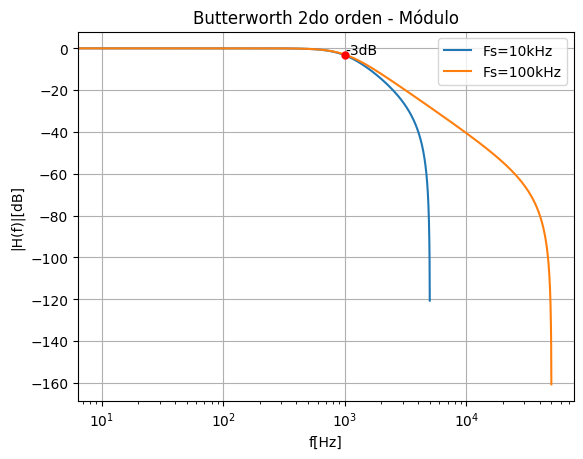

In [26]:
fig = plt.figure()
plt.grid(True)
plt.title('Butterworth 2do orden - Módulo')
plt.semilogx(wz2*fs2/(2*np.pi), 20*np.log10(np.abs(Hz2)),
             label='Fs=10kHz')
plt.semilogx(wz*fs1/(2*np.pi), 20*np.log10(np.abs(Hz)),
             label='Fs=100kHz')
plt.legend()
plt.xlabel('f[Hz]')
plt.ylabel('|H(f)|[dB]')    
plt.plot(10**3, -3, 'o', color='red', ms=5)
plt.annotate("-3dB", [10**3, -3])


<a name="ej2C">
   <h2>C) Pasa-altos con frecuencia de corte de 6 kHz</h2>
</a>
Construimos el filtro pasa-altos con la frecuencia de corte en 6 kHz:

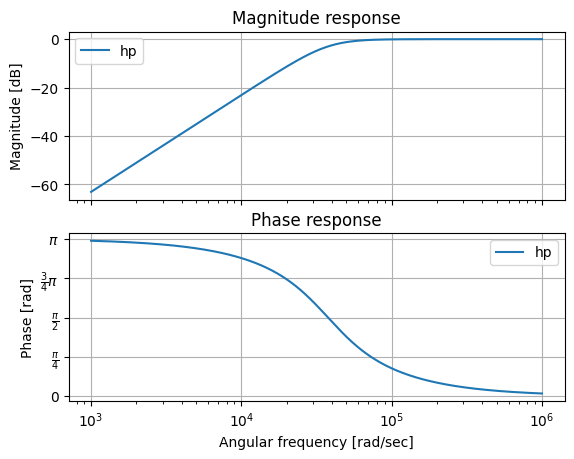

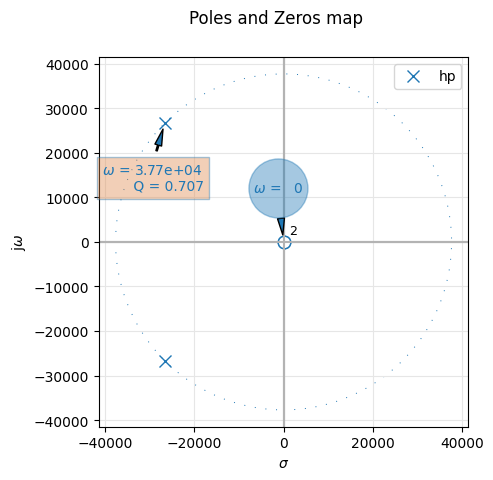

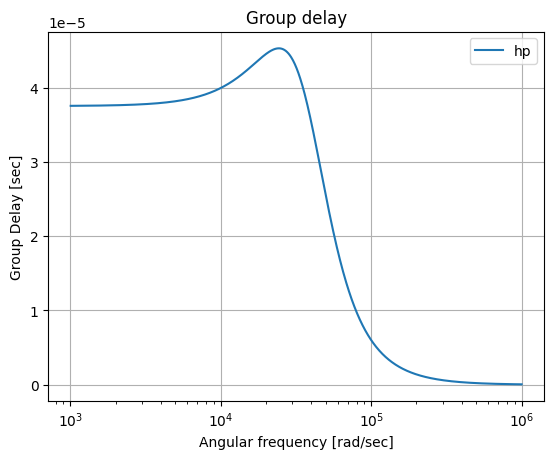

In [33]:
num,den = sig.butter(2, 2*np.pi*6000, btype='highpass', analog = True)
analyze_sys([sig.TransferFunction(num, den)], ['hp'])

### Frecuencia de muestreo de 100 kHz
Aplicamos el nucleo de la transformada bilineal y muestreamos en primer lugar a 100 kHz.

/tmp/ipykernel_4153/1464766883.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(Hz)),
/tmp/ipykernel_4153/1464766883.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(Hs)),


Text(6000, -3, '-3dB')

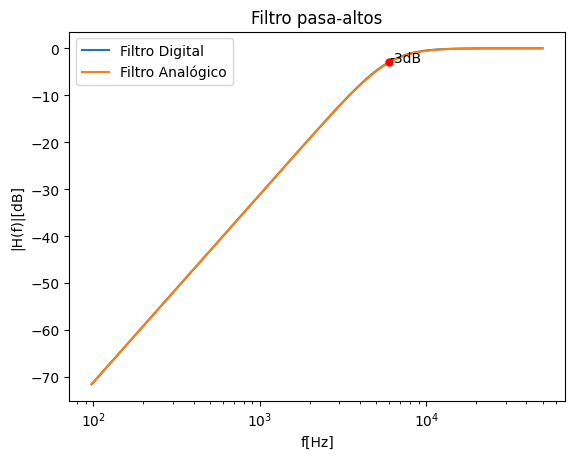

In [37]:
fs = 100000
numZ,denZ = sig.bilinear(num, den,fs=fs)
wz, Hz = sig.freqz(numZ, denZ)
ws, Hs = sig.freqs(num, den, worN=fs*wz)
fig = plt.figure()
plt.title('Filtro pasa-altos')
plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(Hz)),
             label='Filtro Digital')
plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(Hs)),
             label='Filtro Analógico')
plt.legend()
plt.xlabel('f[Hz]')
plt.ylabel('|H(f)|[dB]')    
plt.plot(6*10**3, -3, 'o', color='red', ms=5)
plt.annotate("-3dB", [6*10**3, -3])

### Frecuencia de muestreo de 10 kHz
Muestreamos ahora a una frecuencia de 10 kHZ.

/tmp/ipykernel_4153/1326639070.py:7: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(Hz)),
/tmp/ipykernel_4153/1326639070.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(Hs)),


Text(6000, -3, '-3dB')

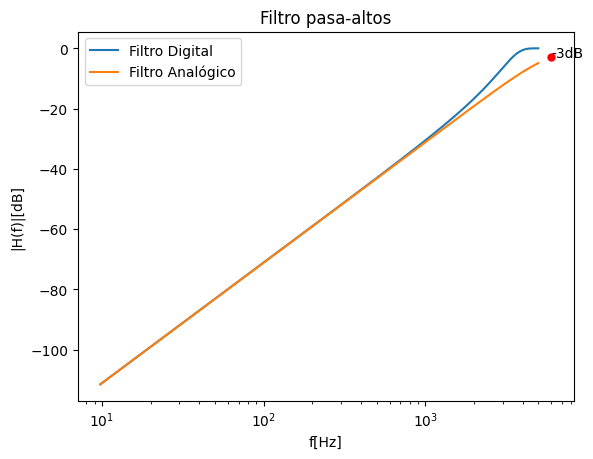

In [40]:
fs = 10000
numZ,denZ = sig.bilinear(num, den,fs=fs)
wz, Hz = sig.freqz(numZ, denZ)
ws, Hs = sig.freqs(num, den, worN=fs*wz)
fig = plt.figure()
plt.title('Filtro pasa-altos')
plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(Hz)),
             label='Filtro Digital')
plt.semilogx(wz*fs/(2*np.pi), 20*np.log10(np.abs(Hs)),
             label='Filtro Analógico')
plt.legend()
plt.xlabel('f[Hz]')
plt.ylabel('|H(f)|[dB]')    
plt.plot(6*10**3, -3, 'o', color='red', ms=5)
plt.annotate("-3dB", [6*10**3, -3])

<a name="ej2D">
   <h2>D) Prewarping</h2>
</a>
Vemos que en el caso del segundo pasa-altos diseñado a partir del Butterworth de máxima planicidad, la frecuencia de corte se encuentra muy cercana a la frecuencia de muestreo provocando distorsión en la banda de paso, es por ello que en este caso amerita aplicar prewarping. 

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="parte2">
        <h1>PARTE 2</h1>
    </a>    
</center>
</div>

<a name="ej3">
   <h2>Ejercicio 3</h2>
</a>
<img src="./rsc/Ej3a.png" align="center" width="734" height="429" /> 
<img src="./rsc/Ej3b.png" align="center" width="771" height="219" /> 

<a name="ej3a">
   <h2>a) Filtro de media móvil (moving average)</h2>
</a>

### Respuesta h1:

\begin{equation}
h_1(k)=(1,1) \space\space \rightarrow \space\space h(0)= 1 \space\space y \space\space h(1)=1
\end{equation}

Transformada Z:
\begin{equation}
h_1(Z)= 1 + Z^{-1} = \frac{Z+1}{Z}
\end{equation}

Obtenemos la forma exponencial:
\begin{equation}
h_1(\Omega) = \frac{e^{j\Omega}+1}{e^{j\Omega}}
\end{equation}

\begin{equation}
h_1(\Omega) = \frac{e^{\frac{j\Omega}{2}}*(e^{\frac{-j\Omega}{2}} + e^{\frac{j\Omega}{2}})}{e^{j\Omega}}
\end{equation}

\begin{equation}
\boxed{h_1(\Omega) = e^{\frac{-j\Omega}{2}} * 2 cos(\frac{\Omega}{2})}
\end{equation}

Desglosando la expresión:

Modulo:
\begin{equation}
\boxed{|h_1(\Omega)| = 2 cos(\frac{\Omega}{2})}
\end{equation}

Fase:
\begin{equation}
\boxed{\phi(\Omega) = -\frac{\Omega}{2}}
\end{equation}


### Diagrama de polos y ceros:

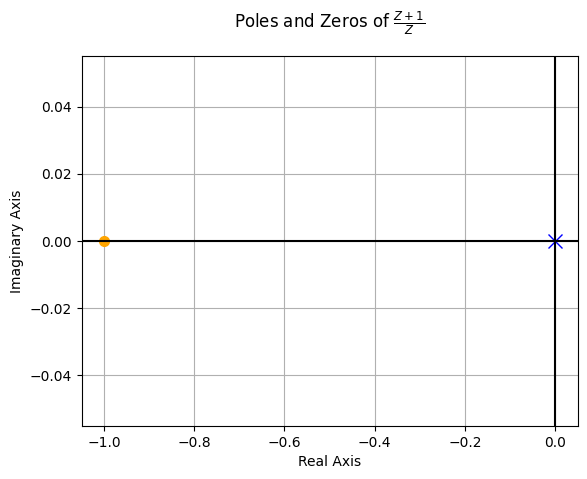

In [49]:
pole_zero_plot(TransferFunction(Z+1,Z, Z))   

### Respuesta de módulo y fase:

Text(1, -1.5707963267948966, '-pi/2')

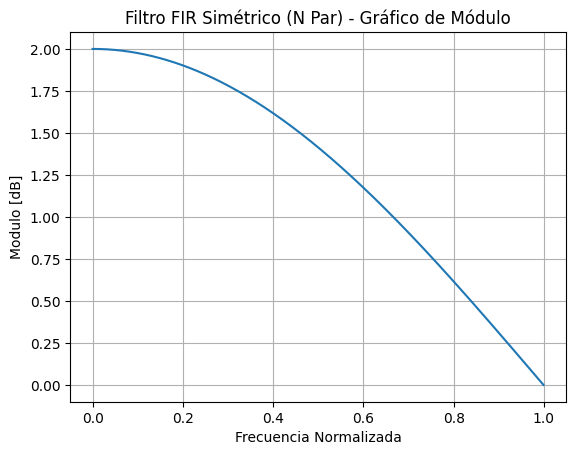

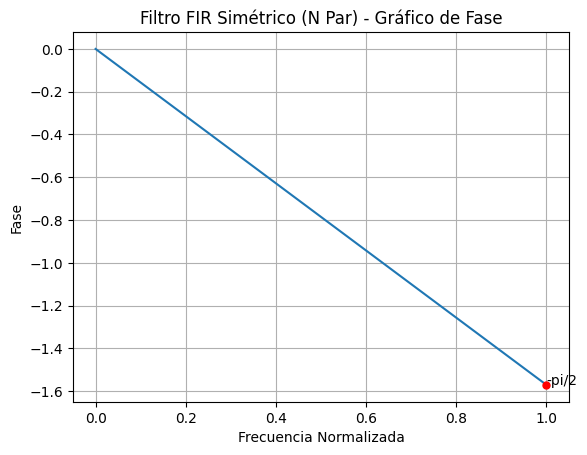

In [56]:
#Construcción de la transferencia
num = np.array([1, 1])
den = np.array([1])
#Obtener respuesta:
wrad, hh = sig.freqz(num, den, worN=1000)
#Escalar omega
ww = wrad / np.pi

#Grafico de modulo
plt.figure(1)
plt.plot(ww,np.abs(hh))
plt.title('Filtro FIR Simétrico (N Par) - Gráfico de Módulo')
plt.xlabel('Frecuencia Normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both',axis='both')

#Gráfico de fase 
plt.figure(2)
plt.plot(ww,np.angle(hh))
plt.title('Filtro FIR Simétrico (N Par) - Gráfico de Fase')
plt.xlabel('Frecuencia Normalizada')
plt.ylabel('Fase')
plt.grid(which='both',axis='both')
plt.plot(1, -np.pi/2, 'o', color='red', ms=5)
plt.annotate("-pi/2", [1, -np.pi/2])

Se verifica que la respuesta coincide con las expresiones obtenidas a partir de la exponencial

### Respuesta h2:

\begin{equation}
h_2(k)=(1,1,1)
\end{equation}

Transformada Z:
\begin{equation}
h_2(Z)= 1 + Z^{-1} + Z^{-2}  = \frac{Z²+Z+1}{Z²} 
\end{equation}

Obtenemos la forma exponencial:
\begin{equation}
h_2(\Omega) = \frac{ e^{2j\Omega} + e^{j\Omega} + 1 }{ e^{2j\Omega}  }
\end{equation}

\begin{equation}
h_2(\Omega) = e^{j\Omega} \frac{ e^{j\Omega} + e^{-j\Omega} + 1 }{ e^{2j\Omega}  }
\end{equation}

\begin{equation}
\boxed{h_2(\Omega) = e^{-j\Omega} (2cos(\Omega) + 1)} 
\end{equation}

Modulo:
\begin{equation}
\boxed{h_2(\Omega) = 2cos(\Omega) + 1} 
\end{equation}

Fase:
\begin{equation}
\boxed{h_2(\Omega) = -\Omega} 
\end{equation}




### Diagrama de polos y ceros:

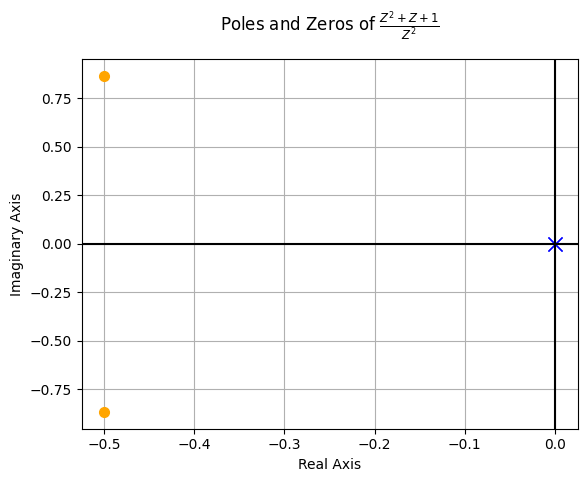

In [54]:
pole_zero_plot(TransferFunction(Z**2+Z+1,Z**2, Z))  

### Respuesta de modulo y fase:

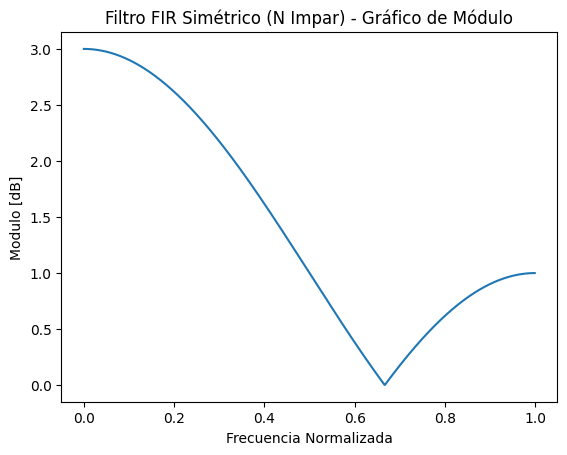

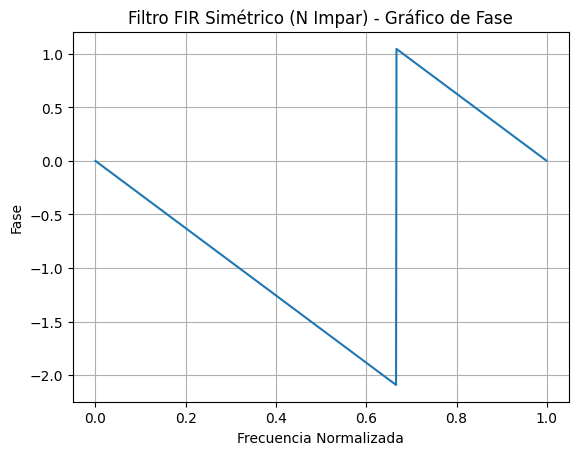

In [66]:
num = np.array([1, 1, 1])
den = np.array([1, 0, 0])
#Obtener respuesta:
wrad, hh = sig.freqz(num, den, worN=1000)
#Escalar omega
ww = wrad / np.pi

#Grafico de modulo
plt.figure(1)
plt.plot(ww,np.abs(hh))
plt.title('Filtro FIR Simétrico (N Impar) - Gráfico de Módulo')
plt.xlabel('Frecuencia Normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both',axis='both')
plt.grid(which='both',axis='both')

#Gráfico de fase 
plt.figure(2)
plt.plot(ww,np.angle(hh))
plt.title('Filtro FIR Simétrico (N Impar) - Gráfico de Fase')
plt.xlabel('Frecuencia Normalizada')
plt.ylabel('Fase')
plt.grid(which='both',axis='both')

### 1) Media aritmética

Para que la salida represente la salida aritmetica los coeficientes debería ser:

\begin{equation}
C_i = \frac{1}{n}
\end{equation}
Siendo "n" el orden del filtro, de esta forma:

\begin{equation}
Y[0]= X[0]*h[0] \newline
Y[1]= X[1]*h[1]+Y[0] \newline
... \newline
Y[n]= X[n]*h[n]+Y[n-1] \newline
\end{equation}

\begin{equation}
Y[n]= \frac{X[n]}{n}+\frac{X[n-1]}{n} = \frac{1}{n} \sum_{1}^{n} X[n]+X[n-1]
\end{equation}


### 2) Eliminación del ruido de línea:
Para eliminar el ruido producido por el suministro de linea a frecuencia industrial (50Hz) se debe desplazar el cero de la transferencia:

\begin{equation}
|h2(\Omega)| = 2cos(\Omega)+1 = 0 
\end{equation}

\begin{equation}
\Omega = arcos(\frac{-1}{2}) = \frac{2}{3}\pi 
\end{equation}

\begin{equation}
\Omega = \frac{\omega}{f_s} = \frac{2}{3}\pi
\end{equation}

Para suprimir el armónico de 50Hz:
\begin{equation}
f_s = \frac{3 \omega}{2 \pi} = \frac{3*2\pi f_l}{2 \pi} = \boxed{150 Hz}
\end{equation}


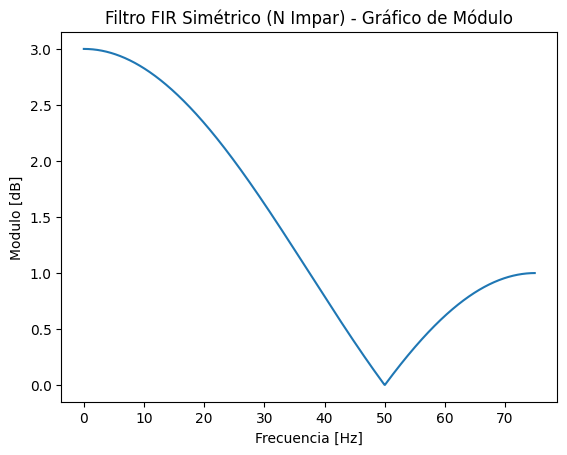

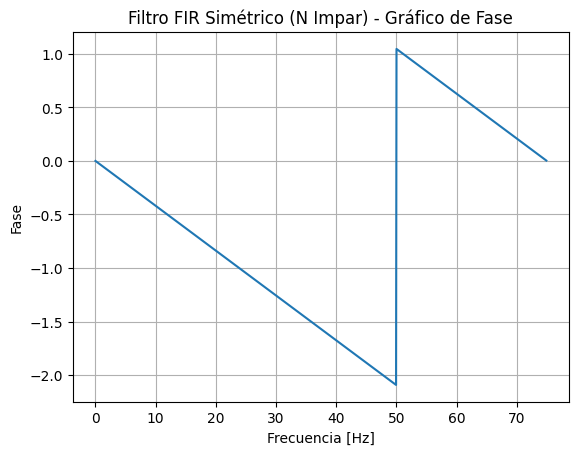

In [3]:
num = np.array([1, 1, 1])
den = np.array([1, 0, 0])
#Obtener respuesta:
wrad, hh = sig.freqz(num, den, worN=1000)
#Desnormalizacion
fs = 150
ww = wrad*fs / (2*np.pi)

#Grafico de modulo
plt.figure(1)
plt.plot(ww,np.abs(hh))
plt.title('Filtro FIR Simétrico (N Impar) - Gráfico de Módulo')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Modulo [dB]')
plt.grid(which='both',axis='both')
plt.grid(which='both',axis='both')

#Gráfico de fase 
plt.figure(2)
plt.plot(ww,np.angle(hh))
plt.title('Filtro FIR Simétrico (N Impar) - Gráfico de Fase')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase')
plt.grid(which='both',axis='both')

<a name="ej3b">
   <h2>b) Filtro Diferenciador</h2>
</a>

### Respuesta h1 (primer orden)

\begin{equation}
h_1(k)=(1,-1) 
\end{equation}

Desarrollo de la salida:
\begin{equation}
Y[0] = X[0]*h[0] = X[0]*1
\end{equation}

\begin{equation}
Y[1] = X[1]*h[1] + Y[0] = -X[1]+X[0] = X[n] -X[n-1]
\end{equation}

Transformada Z:
\begin{equation}
Y(Z)= X(Z)-X(Z)*Z^{-1}  
\end{equation}

\begin{equation}
H_1(Z)= \frac{Y(Z)}{X(Z)} = 1-Z^{-1}  = \frac{Z-1}{Z}  
\end{equation}

Obtenemos la forma exponencial:
\begin{equation}
H_1(\Omega) = \frac{e^{j\Omega}-1}{e^{j\Omega}}
\end{equation}

\begin{equation}
H_1(\Omega)= e^{\frac{j\Omega}{2}} * \frac{ e^{\frac{j\Omega}{2}} - e^{\frac{-j\Omega}{2}}     }{  e^{j\Omega} }
\end{equation}

\begin{equation}
H_1(\Omega)= e^{\frac{-j\Omega}{2}} * 2j*sen(\frac{\Omega}{2}) = e^{\frac{-j\Omega}{2}} * 2e^{j\frac{\pi}{2}}*sen(\frac{\Omega}{2})
\end{equation}

\begin{equation}
\boxed{H_1(\Omega) = 2*e^{j \frac{\pi-\Omega}{2}} *sen(\frac{\Omega}{2})}
\end{equation}

Modulo:
\begin{equation}
\boxed{|H_1(\Omega)| = 2sen(\frac{\Omega}{2})}
\end{equation}

Fase:
\begin{equation}
\boxed{\varphi(\Omega)_{H_1} = \frac{\pi-\Omega}{2}} 
\end{equation}


### Diagrama de polos y ceros:

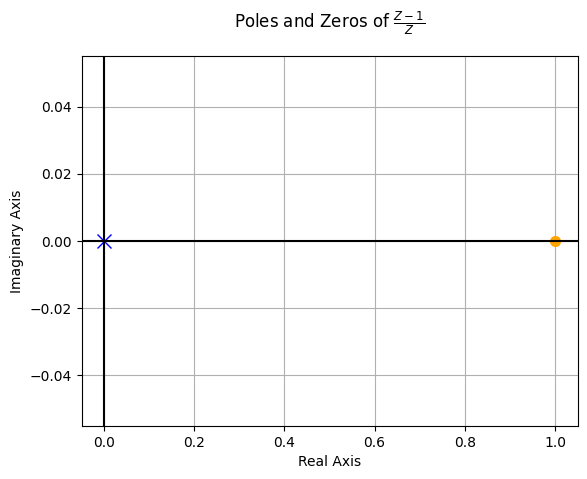

In [9]:
pole_zero_plot(TransferFunction(Z-1,Z, Z))   

### Respuesta de modulo y fase:

Text(1, 0, 'pi')

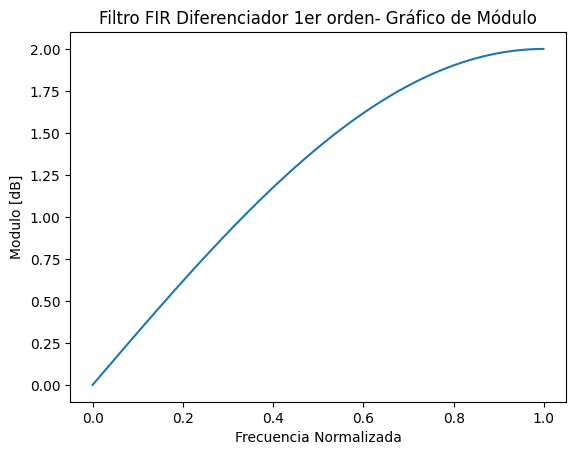

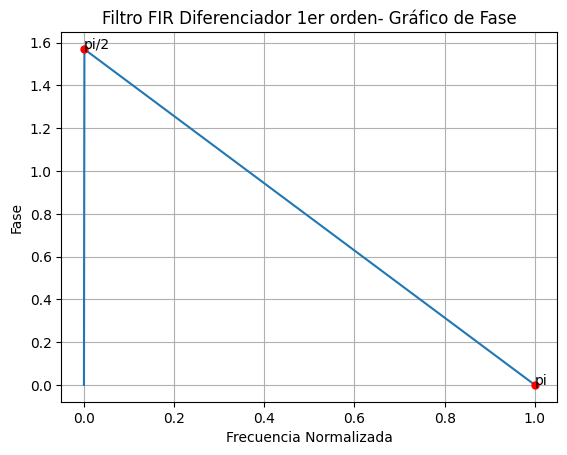

In [18]:
num = np.array([1, -1])
den = np.array([1])
#Obtener respuesta:
wrad, hh = sig.freqz(num, den, worN=1000)
#Escalar omega
ww = wrad / np.pi

#Grafico de modulo
plt.figure(1)
plt.plot(ww,np.abs(hh))
plt.title('Filtro FIR Diferenciador 1er orden- Gráfico de Módulo')
plt.xlabel('Frecuencia Normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both',axis='both')
plt.grid(which='both',axis='both')

#Gráfico de fase 
plt.figure(2)
plt.plot(ww,np.angle(hh))
plt.title('Filtro FIR Diferenciador 1er orden- Gráfico de Fase')
plt.xlabel('Frecuencia Normalizada')
plt.ylabel('Fase')
plt.grid(which='both',axis='both')
plt.plot(0, np.pi/2, 'o', color='red', ms=5)
plt.annotate("pi/2", [0, np.pi/2])
plt.plot(1, 0, 'o', color='red', ms=5)
plt.annotate("pi", [1, 0])

### Respuesta h2 (segundo orden)

\begin{equation}
h_2(k)=(1,0,-1) 
\end{equation}

Transformada Z:
\begin{equation}
H_2(Z)= \frac{Y(Z)}{X(Z)} = 1+Z^{-1}*0-Z^{-2} = \frac{Z²-1}{Z²}  
\end{equation}

Obtenemos la forma exponencial:
\begin{equation}
H_2(\Omega) = \frac{e^{2j\Omega}-1}{e^{2j\Omega}}
\end{equation}

\begin{equation}
H_2(\Omega)= e^{j\Omega} \frac{e^{j\Omega} -e^{-j\Omega} }{e^{2j\Omega}}
\end{equation}

\begin{equation}
H_2(\Omega)= e^{-j\Omega} (e^{j\Omega} -e^{-j\Omega})
\end{equation}

\begin{equation}
H_2(\Omega)= e^{-j\Omega} *2j*sen(\Omega)
\end{equation}

\begin{equation}
\boxed{H_2(\Omega) = e^{j (\frac{\pi}{2}-\Omega) } *2sen(\Omega)}
\end{equation}

Modulo:
\begin{equation}
\boxed{|H_2(\Omega)| = 2sen(\Omega)}
\end{equation}

Fase:
\begin{equation}
\boxed{\varphi(\Omega)_{H_2} = \frac{\pi}{2}-\Omega}
\end{equation}


### Diagrama de polos y ceros

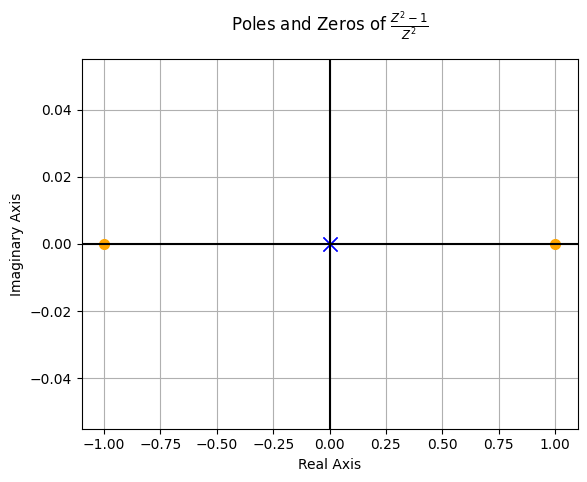

In [14]:
pole_zero_plot(TransferFunction(Z**2-1,Z**2, Z))   

### Respuesta de modulo y fase:

Text(1, -1.5707963267948966, '-pi/2')

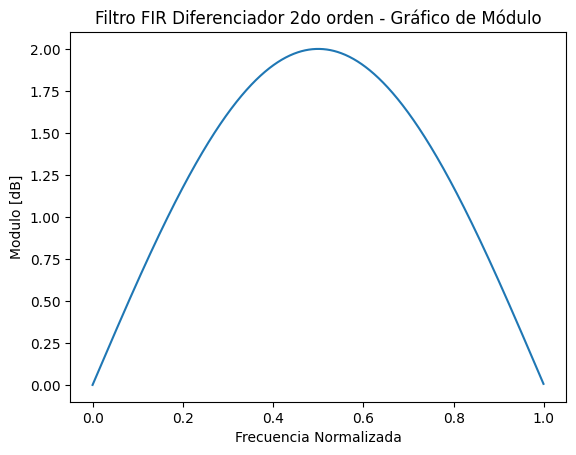

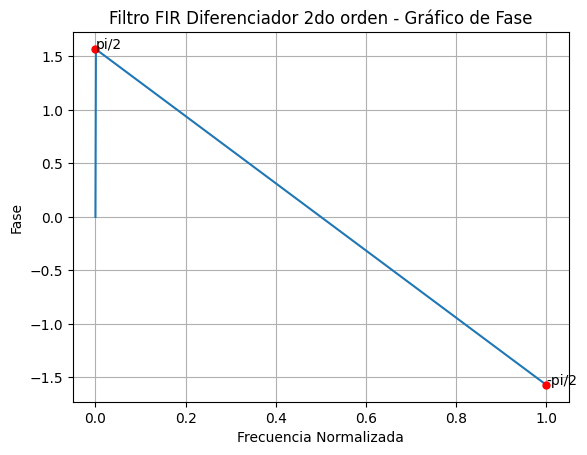

In [17]:
num = np.array([1,0,-1])
den = np.array([1,0,0])
#Obtener respuesta:
wrad, hh = sig.freqz(num, den, worN=1000)
#Escalar omega
ww = wrad / np.pi

#Grafico de modulo
plt.figure(1)
plt.plot(ww,np.abs(hh))
plt.title('Filtro FIR Diferenciador 2do orden - Gráfico de Módulo')
plt.xlabel('Frecuencia Normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both',axis='both')
plt.grid(which='both',axis='both')

#Gráfico de fase 
plt.figure(2)
plt.plot(ww,np.angle(hh))
plt.title('Filtro FIR Diferenciador 2do orden - Gráfico de Fase')
plt.xlabel('Frecuencia Normalizada')
plt.ylabel('Fase')
plt.grid(which='both',axis='both')
plt.plot(0, np.pi/2, 'o', color='red', ms=5)
plt.annotate("pi/2", [0, np.pi/2])
plt.plot(1, -np.pi/2, 'o', color='red', ms=5)
plt.annotate("-pi/2", [1, -np.pi/2])

### 1) Demora introducida por los sistemas:

Para h1:
\begin{equation}
\tau = -\frac{d\varphi_{H_1}}{d\Omega}= \frac{1}{2} 
\end{equation}

Para h2:
\begin{equation}
\tau = -\frac{d\varphi_{H_2}}{d\Omega}= 1 
\end{equation}


### 2) Comportamiento como derivador ideal:

Según la consigna:
\begin{equation}
\frac{|H(\Omega)_{ideal}|-|H(\Omega)_{real}|}{|H(\Omega)_{ideal}|} = 0,05
\end{equation}

Para h1:
\begin{equation}
\frac{\Omega - 2sen(\frac{\Omega}{2})}{\Omega} = 0,05
\end{equation}

\begin{equation}
sen(\frac{\Omega}{2}) = 0.475*\Omega
\end{equation}

Resolviendo la ecuación:

In [32]:
x = sp.symbols('x')
sp.nsolve(sp.sin(x/2)-0.475*x,x,1)

1.10382195724372

Para h2:
\begin{equation}
\frac{\Omega - 2sen(\Omega)}{\Omega} = 0,05
\end{equation}

\begin{equation}
sen(\Omega) = 0.475*\Omega
\end{equation}

Resolviendo la ecuación:

In [33]:
sp.nsolve(sp.sin(x)-0.475*x,x,1)

1.95320045050372

<div class="alert alert-success text-left">
<img src="./rsc/logo_UTN.svg" align="right" width="150" /> 
<center> 
    <a name="parte2">
        <h1>PARTE 2</h1>
    </a>    
</center>
</div>

<img src="./rsc/parte2.png" align="center" width="1202" height="276" /> 


### 1) Transferencia del filtro

\begin{equation}
Y(Z) = X(Z)Z^{-M} + (X(Z)-Y(Z)Z^{-M})\alpha
\end{equation}

\begin{equation}
Y(Z) = X(Z)Z^{-M} + X(Z)\alpha-Y(Z)Z^{-M}\alpha
\end{equation}

\begin{equation}
Y(Z)(1+Z^{-M}) = X(Z)(Z^{-M} + \alpha)
\end{equation}

\begin{equation}
H(Z) = \frac{Y(Z)}{X(Z)} = \frac{Z^{-M}+\alpha}{1+ \alpha Z^{-M}}
\end{equation}

\begin{equation}
\boxed{H(Z) = 0,8 \frac{Z²+\frac{1}{0,8}}{Z²+0,8}}
\end{equation}


### 2) Diagrama de polos y ceros

(1, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

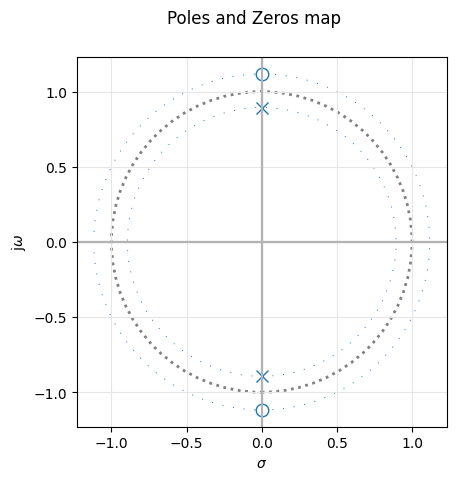

In [13]:
pzmap(TransferFunction( [0.8,0,1], [1,0,0.8] ))

### 3) Respuesta de modulo y fase

Text(0.5, -3.141592653589793, '-pi')

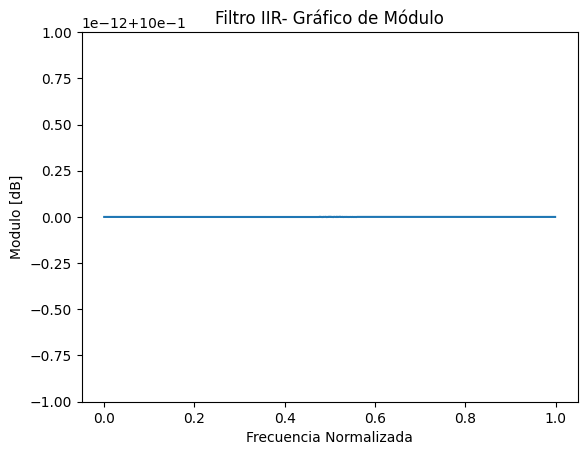

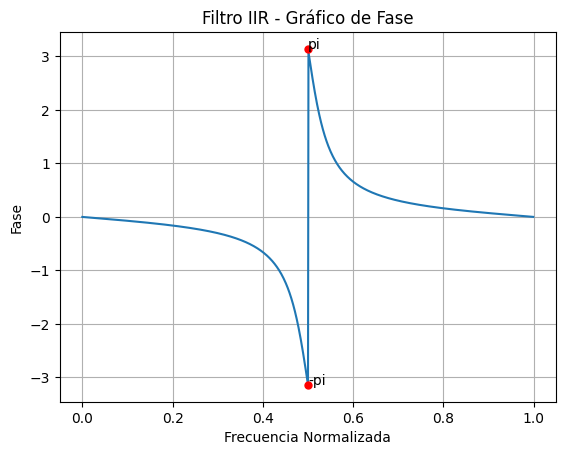

In [21]:
num = np.array([0.8,0,1])
den = np.array([1,0,0.8])
#Obtener respuesta:
wrad, hh = sig.freqz(num, den, worN=1000)
#Escalar omega
ww = wrad / np.pi

#Grafico de modulo
plt.figure(1)
plt.plot(ww,np.abs(hh))
plt.title('Filtro IIR- Gráfico de Módulo')
plt.xlabel('Frecuencia Normalizada')
plt.ylabel('Modulo [dB]')
plt.grid(which='both',axis='both')
plt.grid(which='both',axis='both')

#Gráfico de fase 
plt.figure(2)
plt.plot(ww,np.angle(hh))
plt.title('Filtro IIR - Gráfico de Fase')
plt.xlabel('Frecuencia Normalizada')
plt.ylabel('Fase')
plt.grid(which='both',axis='both')
plt.plot(0.5, np.pi, 'o', color='red', ms=5)
plt.annotate("pi", [0.5, np.pi])
plt.plot(0.5, -np.pi, 'o', color='red', ms=5)
plt.annotate("-pi", [0.5, -np.pi])


------